<a href="https://colab.research.google.com/github/caramos84/Quantum/blob/main/CompuertaHadamard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Cirq Qutip Compuerta Hadamard en dos Qubits
# Carlos Ramos + ChatGPTo1
# 17-02-2025

In [6]:
!pip install qutip
!pip install cirq
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [14]:
# Importación de librerías
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    import cirq
    print("installed cirq.")

import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [15]:
# Crear circuito con Cirq
qubits = [cirq.LineQubit(i) for i in range(2)]
circuit = cirq.Circuit(
    cirq.H(qubits[0]),
    cirq.H(qubits[1])
)
print("Circuito:")
print(circuit)

Circuito:
0: ───H───

1: ───H───


In [9]:
# Crear un circuito con compuerta Hadamard en ambos qubits
circuit = cirq.Circuit(
    cirq.H(qubits[0]),
    cirq.H(qubits[1])
)

print("Circuito Cuántico:")
print(circuit)

Circuito Cuántico:
(0, 0): ───H───

(0, 1): ───H───


In [16]:
# Ejecutar circuito
simulator = cirq.Simulator()
result = simulator.simulate(circuit)
state_vector = result.final_state_vector

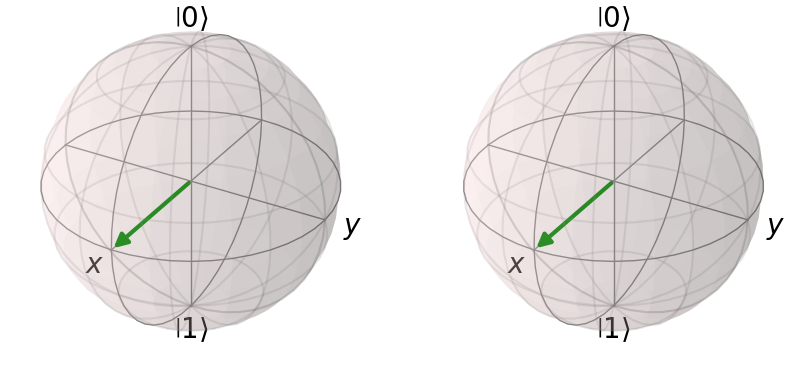

In [17]:
# Convertir el estado a Qutip para graficar
state_qutip = Qobj(state_vector, dims=[[2, 2], [1, 1]])

# Función para obtener el vector de Bloch
def bloch_vec(rho):
    x = expect(sigmax(), rho)
    y = expect(sigmay(), rho)
    z = expect(sigmaz(), rho)
    return [x, y, z]

# Obtener vectores de Bloch para cada qubit
bloch_vectors = []
for i in range(2):
    rho = state_qutip.ptrace(i)  # Toma la matriz reducida del qubit i
    bloch_vectors.append(bloch_vec(rho))

# Graficar la esfera de Bloch para cada qubit
fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(10, 5))
for i in range(2):
    sphere = Bloch(axes=axes[i])
    sphere.add_vectors(bloch_vectors[i])
    sphere.make_sphere()
plt.show()